$\textbf{Poisson et valeurs propres}$

Nous allons dans ce cours définir des "poissons de valeurs propres" 
de son nom anglais eigenfish et en profiter pour définir un théoreme assez puissant
sur les valeurs propres: le théorème des cercles de Gershgorin.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

Par définition les eigenfishs sont des représentations sur un plan complexe des valeurs propres
d'une famille de matrice complexe. Les formes des eigenfishs peut être modifier en fonction de la famille
choisi.
Prenons un exemple:

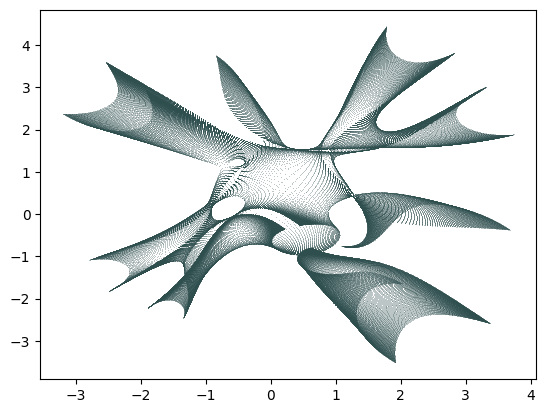

In [31]:
a=200
r=[]
c=[]
t=-10
o=-10

#a permet de modifier le nombre de point du schema (a*a*5 points) il est a ajuster en fonction 
#de la puissance de l'ordi.
#o et t seront des variables et r et c stockent les coordonnées des valeurs propres.

for k in range(a):
    o=-10
    for j in range(a):
        e=np.array([[1,1,0,1j,-1],
                    [-1,0,1j,-1,1j],
                    [1,t,1j,1j,0],
                    [1,0,1,1j,o],
                    [1,-1,-1,1j,1]])
        l=np.linalg.eigvals(e)
        o=o+(20/a)
        for i in range(5):
            r.append(l[i].real)
            c.append(l[i].imag)
    t=t+(20/a)
#On regarde les eigenvalues de la matrice en variant o et t et on note leurs coordonées 
#sur le plan complexe dans r et c.

plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")

Nous avons ici une représentation des valeurs propres de la famille de matrice 
$$
\{\begin{pmatrix}
1&1&0&i&-1\\
-1&0&i&-1&i\\
1&t&i&i&0\\
1&0&1&i&0\\
1&-1&-1&i&1
\end{pmatrix}
|o,t \in [-10,10]\}
$$

Pour créer notre famille, on glisse dans les coefficient d'une matrice des variables, ici o et t.

Dans cet exemple o et t varient dans l'itervalle $[-10,10]$ mais on peut ce demander ce qu'il se passe lorsqu'on bidouille cet intervalle. On peut par exemple prendre o et t dans le cercle unitaire:

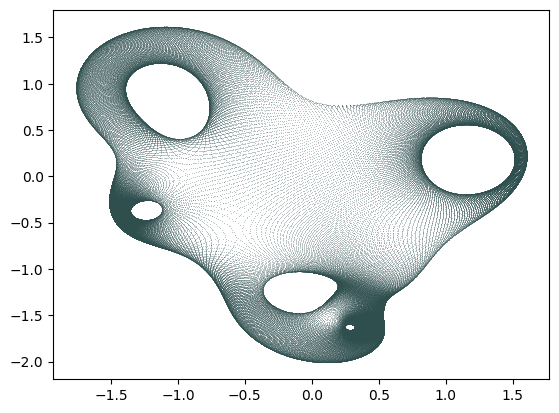

In [3]:
a=200
r=[]
c=[]
t=0
o=0
for k in range(a):
    o=0
    for j in range(a):
        e=np.array([[-1j,1,-1j,0,0],
                    [-1j,-1,np.exp(o*1j),1j,1j],
                    [0,-1j,-1j,0,-1j],
                    [1,np.exp(t*1j),0,1,1],
                    [1j,1j,-1j,1,-1]])
        l=np.linalg.eigvals(e)
        o=o+(2*np.pi/a)
        for i in range(5):
            r.append(l[i].real)
            c.append(l[i].imag)
    t=t+(2*np.pi/a)

plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")


Ici notre famille de matrice sera:
$$
\{
\begin{pmatrix}
-i&1&-i&0&0\\
-i&-1&e^{oi}&i&i\\
0&-i&-i&0&-i\\
1&e^{ti}&0&0&1\\
i&i&-i&1&-1
\end{pmatrix}
|o,t \in [0,2\pi]\}
$$

Ces formes sont assez drôle et montrent quelque chose d'important, l'ensemble des valeurs propres de nos familles de matrices semblent bornées dans C. C'est ici qu'intervient le théorème des cercles de Gershgorin.

$\textbf{Cercles de Gershgorin}:\\$
Soit $A=(a_{ij})$ une matrice de taille n. Pour tout i, on nomme disque de Gershgorin le disque $D_i$
tel que:
$$
D_i=\{x\in C \text{ tq } \lVert x - a_{ii} \rVert \leq \sum_{j \neq i} \lVert a_{ij} \rVert \}
$$

Soit $\Lambda$ l'ensemble des valeurs propres de A.$\\$
On aura donc: $\Lambda \subset \bigcup_{i=1}^nD_i $

Si l'on utilise ce théorème sur nos eigenfish, on voit que si la norme de nos variables est bornée, il existe une union finie de disque qui borne notre poissongue.
Essayons dans un premier temps de visualiser les disques avec des variables dans le cercle unitaire, leur norme sera constante égale à 1 donc les disques restent les mêmes anyway (j'en profite pour faire un générateur aléatoire d'eigenfish):


la matrice est:
[[-0.        -1.j          0.99950656-0.03141076j  1.        +0.j
  -0.        -1.j          1.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -1.        +0.j
  -0.        -1.j          0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j         -1.        +0.j
   0.        +0.j         -1.        +0.j        ]
 [ 0.99950656-0.03141076j -1.        +0.j          0.        +0.j
   0.        +1.j          0.        +0.j        ]
 [ 0.        +1.j          1.        +0.j          1.        +0.j
  -0.        -1.j         -0.        -1.j        ]]


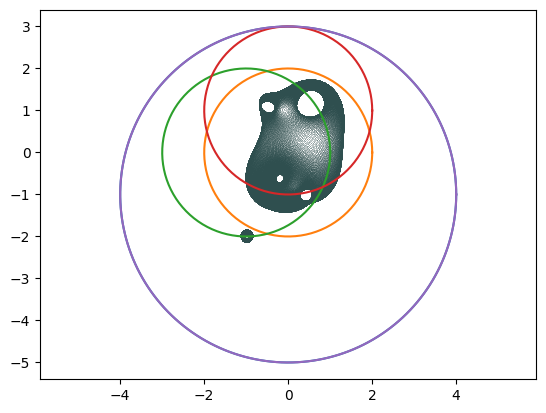

In [36]:

test=1
#la valeur du test indique si l'on veut voir les anneaux de Gershgorin
#1 si oui, 0 si non

u=rnd.choices([1,1j,0,-1,-1j], k=5)
n=rnd.choices([1,1j,0,-1,-1j], k=5)
m=rnd.choices([1,1j,0,-1,-1j], k=5)
p=rnd.choices([1,1j,0,-1,-1j], k=5)
q=rnd.choices([1,1j,0,-1,-1j], k=5)

#on définit notre matrice avec 5 listes


listes=[u,n,m,p,q]
listeV=rnd.randrange(4)
rangV=rnd.randrange(4)
listeV2=rnd.randrange(4)
rangV2=rnd.randrange(4)
#on definit 2 coefficient qui vont varier grace à leur ligne (listV)
# et leur collone (rangV)

a=200
r=[]
c=[]
o=0
t=0
listes[listeV][rangV]=np.exp(1j*o)
listes[listeV2][rangV2]=np.exp(1j*t)





for k in range(a):
    o=0
    for j in range(a):
        listes[listeV][rangV]=np.exp(1j*o)
        listes[listeV2][rangV2]=np.exp(1j*t)
        e=np.array([u,
                    n,
                    m,
                    p,
                    q])
        l=np.linalg.eigvals(e)
        o=o+(2*np.pi/a)
        for i in range(5):
            r.append(l[i].real)
            c.append(l[i].imag)
    t=t+(2*np.pi/a)


a1=u[0]
a2=n[1]
a3=m[2]
a4=p[3]
a5=q[4]
#on nomme les coefficient de la diagonale

r1=0
r2=0
r3=0
r4=0
r5=0

for i in range(5):
    r1=r1+abs(u[i])
    r2=r2+abs(n[i])
    r3=r3+abs(m[i])
    r4=r4+abs(p[i])
    r5=r5+abs(q[i])
r1=r1-abs(u[0])
r2=r2-abs(n[1])
r3=r3-abs(m[2])
r4=r4-abs(p[3])
r5=r5-abs(q[4])
#on calcule le rayon des cercles de  Gershgorin

roh=np.linspace(0,2*np.pi,200)

if test==1:
    plt.plot(r1*np.cos(roh)+a1.real,r1*np.sin(roh)+a1.imag)
    plt.plot(r2*np.cos(roh)+a2.real,r2*np.sin(roh)+a2.imag)
    plt.plot(r3*np.cos(roh)+a3.real,r3*np.sin(roh)+a3.imag)
    plt.plot(r4*np.cos(roh)+a4.real,r4*np.sin(roh)+a4.imag)
    plt.plot(r5*np.cos(roh)+a5.real,r5*np.sin(roh)+a5.imag)
plt.axis("equal")

plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")
plt.show
print("la matrice est:")
print(e)

On voit bien que les valeurs propres sont incluses dans l'union des cercles. 

Si l'on prend les variables dans R, un resultat plus drôle peut survenir: s
1) Si une variables n'est pas sur la diagonale, le rayons du disque associé à sa ligne va grandir en même temps que la norme de la variable ce qui est pas super fun. 
2) MAIS si la variable est sur la diagonale, le centre du disque associé à sa ligne bouge en même temps que la variable varie, on peut donc essayer de visualiser le mouvement de ce disque, et remarquer que dans ces cas, l'eigenfish admet une particularité.


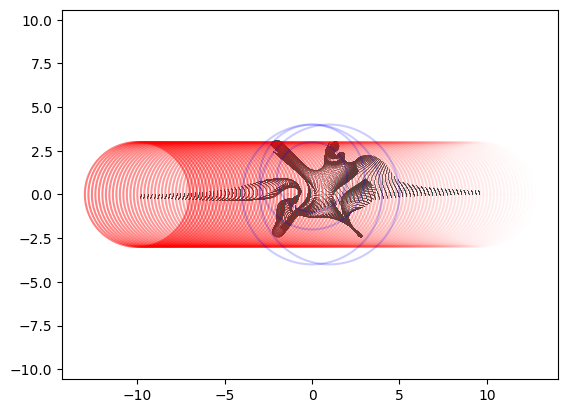

In [48]:

test=1
#encore une fois si test=1 on montre les cercles sinon non. Le schema avec cercle et assez bordelique
#il est intéressant de voir avec et sans pour voir le lien.


a=200
r=[]
c=[]
t=-10
o=-10j
a2=0
a3=1j
a4=1j
a5=1
r1=3
r2=4
r3=3
r4=2
r5=4
#Je fixe la matrice donc je connais le rayon et les coeff de la diagonale

opa=0.5
#opa designe l'intensité des plot pour un effet de style

roh=np.linspace(0,2*np.pi,200)
for k in range(int(a/2)):
    o=-10
    for j in range(a):
        e=np.array([[t,1,0,1j,-1],
                    [-1,0,1j,-1,1j],
                    [1,1,1j,1j,0],
                    [1,0,1,1j,o],
                    [1,-1,-1,1j,1]])
        l=np.linalg.eigvals(e)
        o=o+(20/a)
        for i in range(5):
            r.append(l[i].real)
            c.append(l[i].imag)
    if test==1:
        plt.plot(r1*np.cos(roh)+t.real,r1*np.sin(roh)+t.imag,alpha=opa, color="red")
    opa=opa-1/a
    t=t+(40/a)   
#On plot tous les disques de centre t en rouge (on remarquera que t varie moins sur ce programme
#c'est par soucie d'esthetique

if test==1:
    plt.plot(r2*np.cos(roh)+a2.real,r2*np.sin(roh)+a2.imag,color="blue",alpha=0.2)
    plt.plot(r3*np.cos(roh)+a3.real,r3*np.sin(roh)+a3.imag,color="blue",alpha=0.2)
    plt.plot(r4*np.cos(roh)+a4.real,r4*np.sin(roh)+a4.imag,color="blue",alpha=0.2)
    plt.plot(r5*np.cos(roh)+a5.real,r5*np.sin(roh)+a5.imag,color="blue",alpha=0.2)
plt.axis("equal")
#On plot le reste en bleu et petite opacity parcque c'est pas le plus important

plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")
plt.show()

On voit bien en rouge le disque $D_1$ bouger en même temps que la variable t varie, ce qui se repercute sur la 
forme de l'eigenfish.


$\textbf{Lemme Hadamard}\\$
Un lemme sympa du théorème de (je repeterai pas son nom) dit que si: $\forall i$ $\sum_{i\neq j}\lVert a_{ij} \rVert < \lVert a_{ii} \rVert$

Alors 0 n'est pas dans l'union des disques, il ne peut pas être une valeur propre, la matrice est donc inversible.


$\textbf{Pour le fun}$

Une fois le concept compris, on peut s'amuser à représenter des formes avec des famille de matrices à variable paramétrées, comme un carré de coté x:


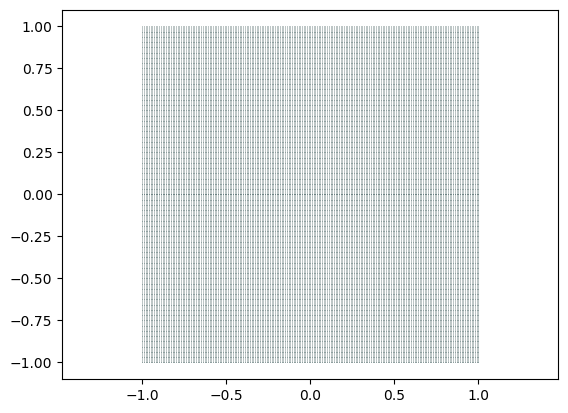

In [63]:
a=200
r=[]
c=[]
x=1
t=-x
o=-x

for k in range(a+1):
    o=-x
    for j in range(a+1):
        e=np.array([[0,(1+(o*1j)/t)**2],
                    [t*t,0]])
        l=np.linalg.eigvals(e)
        o=o+(x/a)
        for i in range(2):
            r.append(l[i].real)
            c.append(l[i].imag)    
    t=t+(2*x/a)

plt.axis("equal")
plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")
plt.show()

Un cercle de rayon x et de centre (b,d):
    

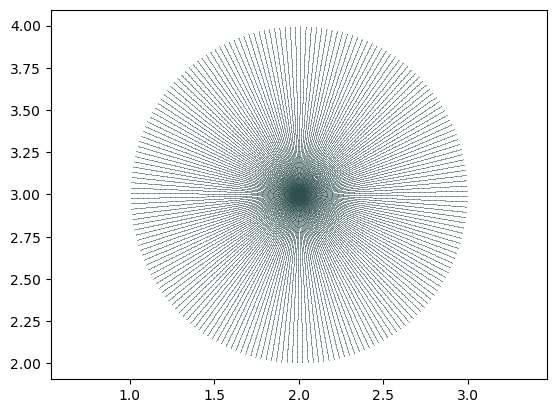

In [62]:
a=200
r=[]
c=[]
t=0.00001
o=-10
x=1
b=2
d=3
for k in range(a):
    o=-10
    for j in range(a):
        e=np.array([[t*np.exp(o*1j)+b+d*1j,0],
                    [0,t*np.exp(o*1j)+b+d*1j]])
        l=np.linalg.eigvals(e)
        o=o+(2*np.pi/a)
        for i in range(2):
            r.append(l[i].real)
            c.append(l[i].imag)
    t=t+x/a
plt.axis("equal")
plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")
plt.show()

On peut même essayer de prendre des variables dans d'autres espace que R ou le cercle unitaire, on peut par exemple le prendre dans un carré centré en 0 et de coté 1 (jme faisais chier un jeudi soir):

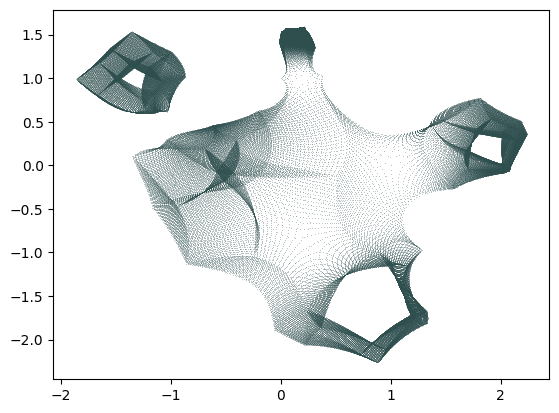

In [64]:
a=45
#Il y a pas mal de boucle, un a faible est plus smart

#le programme prend là aussi une matrice aléatoire
r=[]
c=[]
t=1+1j
o=1+1j
s=-1j
v=-1j
u=rnd.choices([1,1j,0,-1,-1j], k=5)
n=rnd.choices([1,1j,0,-1,-1j], k=5)
m=rnd.choices([1,1j,0,-1,-1j], k=5)
p=rnd.choices([1,1j,0,-1,-1j], k=5)
q=rnd.choices([1,1j,0,-1,-1j], k=5)
listes=[u,n,m,p,q]
listeV=rnd.randrange(4)
rangV=rnd.randrange(4)
listeV2=rnd.randrange(4)
rangV2=rnd.randrange(4)

for f in range(4):   
    for k in range(a):
        o=1+1j
        listes[listeV][rangV]=o
        listes[listeV2][rangV2]=t
        for f in range(4):
            for j in range(a):
                e=np.array([u,
                            n,
                            m,
                            p,
                            q])
                l=np.linalg.eigvals(e)
                o=o+2*s/a
                listes[listeV][rangV]=o
                listes[listeV2][rangV2]=t
                for i in range(5):
                    r.append(l[i].real)
                    c.append(l[i].imag)
            s=-1j*s
        t=t+2*v/a
        listes[listeV][rangV]=o
        listes[listeV2][rangV2]=t
    v=-1j*v

    

plt.scatter(r,c, s=0.1, linewidth=0.1, color="darkslategrey")
plt.show()

Bref pas mal de chose à faire

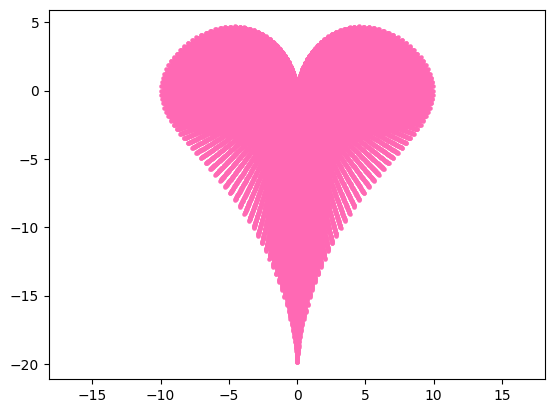

<3


In [66]:
a=200
r=[]
c=[]
t=0
o=0.00001

for k in range(a):
    o=0.00001
    for j in range(a):
        e=np.array([[(np.sin(t)**3+(np.cos(t)-np.cos(t)**4)*1j)*o,0],
                    [0,0]])
        l=np.linalg.eigvals(e)
        o=o+(10/a)
        for i in range(2):
            r.append(l[i].real)
            c.append(l[i].imag)    
    t=t+(2*np.pi/a)
plt.axis("equal")
plt.scatter(r,c, s=10, linewidth=0.1, color="hotpink")
plt.show()
print("<3")